In [49]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import os
from PIL import Image

In [50]:

def draw(detected_circles, image):
    pipes_count=0
    if detected_circles is not None:
        detected_circles = np.uint16(np.around(detected_circles)) # Convert circle metadata to integers

        for points in detected_circles[0, :]:
            a, b, r = points[0], points[1], points[2]

            cv.circle(image, (a, b), r, (0, 255, 0), 2)

            # Draw a small circle (of radius 1) to show the center.
            cv.circle(image, (a, b), 1, (255, 0, 0), 3)

            pipes_count += 1
        return pipes_count


In [51]:

def get_all_circles(img,gauss, params):
    detected_circles=[]
    gray = cv.cvtColor(src, cv.COLOR_RGB2GRAY)
    if gauss=='True':
        gray = cv.GaussianBlur(gray,(7,7),1.5)
    else:
        gray = cv.blur(gray,(3,3))
    for i in range(len(params)):
        dp,minDist,param1,param2,minR,maxR = map(int,params[i].split())
        detected_circles.append(cv.HoughCircles(gray,
                cv.HOUGH_GRADIENT,
                dp,
                minDist,
                param1=param1,
                param2=param2,
                minRadius=minR,
                maxRadius=maxR,))
    imga=img.copy()
    pipes_count =0
    for i in range(len(detected_circles)):
        pipes_count+=draw(detected_circles[i], imga)

    print("Total pipes: ", pipes_count)
    plt.figure()
    plt.imshow(imga)




img/pipes-4.jpg
Total pipes:  78
img/pipes-5.jpg
Total pipes:  169
img/pipes-6.jpg
Total pipes:  97
img/logs-1.jpg
Total pipes:  93
img/logs-2.jpg
Total pipes:  136


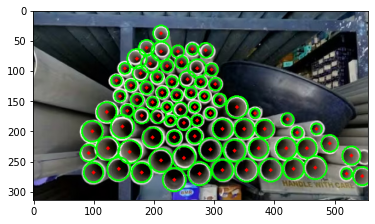

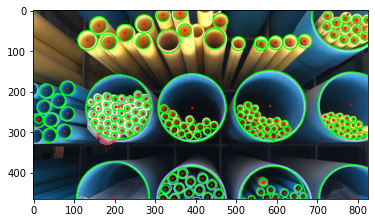

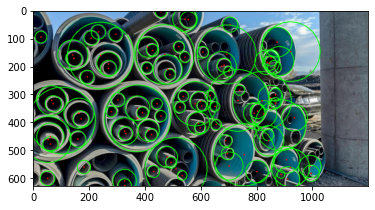

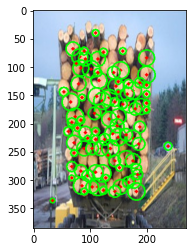

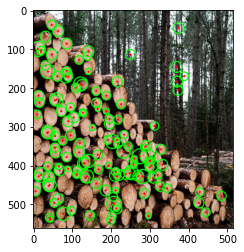

In [52]:
with open('meta.txt','r') as file:
    while True:
        params=[]
        gauss=file.readline()
        source = file.readline()
        print(source.rstrip())
        pil_image = Image.open(source.rstrip())
        img= np.array(pil_image)
        img = np.copy(img[:,:,::-1])
        src = cv.cvtColor(img, cv.COLOR_BGR2RGB)
        temp=file.readline()
        while temp!='img\n' and temp:
            params.append(temp)
            temp=file.readline()
        get_all_circles(src,gauss,params)
        if not temp:
            break






Total pipes:  16


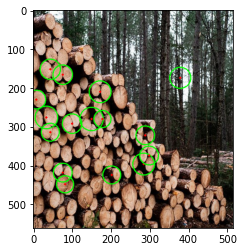

In [53]:
img = cv.imread('img/logs-2.jpg')
img =cv.cvtColor(img, cv.COLOR_BGR2RGB)
get_all_circles(img,True, ["1 10 550 15 21 35"])